In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

url = 'https://github.com/dknife/ML/raw/main/data/twisted_data.csv'
data = pd.read_csv(url)
data=data.values

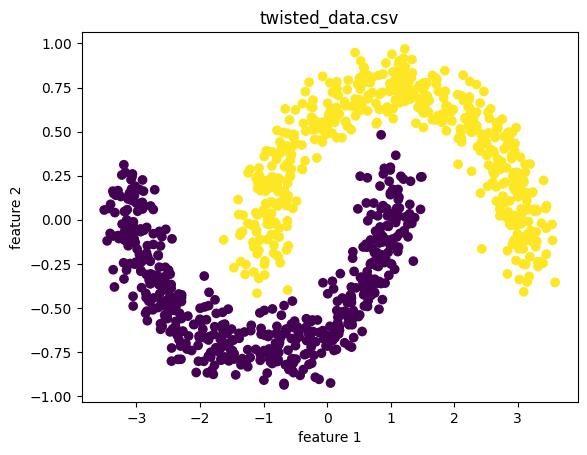

In [2]:
# 데이터 셋의 첫 두 컬럼은 특징(feature), 마지막 컬럼은 레이블(label).
X = data[:, :-1]
y = data[:, -1]

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('twisted_data.csv')
plt.show()

**data를 훈련데이터와 테스트데이터로 분리**

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], shuffle=True, test_size=0.2, random_state=0, stratify=y)

**커널함수가 linear인 SVM 모델 학습**

In [4]:
linear_svm = SVC(kernel = 'linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
linear_svm_accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {linear_svm_accuracy:.3f}")

Linear SVM Accuracy: 0.910


**다항식 데이터변환 코드를 사용한 성능 개선**

In [5]:
degree = 4
poly = PolynomialFeatures(degree = degree, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"PolynomialFeatures with degree {degree} data into {X_train_poly.shape[1]} dim.")

poly_svm = SVC(kernel = 'linear')
poly_svm.fit(X_train_poly, y_train)
y_pred_poly = poly_svm.predict(X_test_poly)
print(f"Polynomial SVM (degree {degree}) Accuracy: {accuracy_score(y_test, y_pred_poly)}")

PolynomialFeatures with degree 4 data into 15 dim.
Polynomial SVM (degree 4) Accuracy: 1.0


**커널함수가 Poly인 SVM모델 학습**

In [6]:
Poly_svm = SVC(kernel = 'poly', degree = 4, coef0 = 1.0)
Poly_svm.fit(X_train, y_train)
y_pred_poly = Poly_svm.predict(X_test)
Poly_svm_accuracy = accuracy_score(y_test, y_pred_poly)
print(f"Poly SVM Accuracy: {Poly_svm_accuracy:.3f}")

Poly SVM Accuracy: 1.000


**PolynomialFeatures로 변환된 데이터 특징 중 2개로 linear SVM 모델 학습**

Best accuracy: 0.930 with features (2, 6)


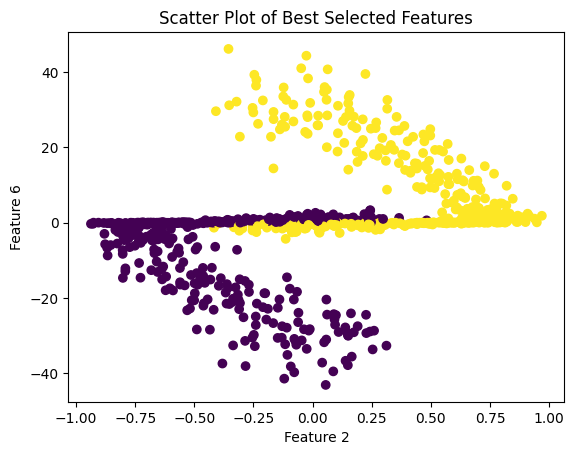

In [9]:
# degree=4로 15개의 특징을 생성
degree = 4
poly = PolynomialFeatures(degree=degree, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

best_accuracy = 0
best_features = None

# 15개의 특징 중 2개씩을 선택해 linear SVM 모델 학습
for i in range(15):
    for j in range(i+1, 15):

        X_sub_train = X_train_poly[:, [i, j]]
        X_sub_test = X_test_poly[:, [i, j]]

        # Linear SVM 학습
        linear_svm = SVC(kernel='linear')
        linear_svm.fit(X_sub_train, y_train)

        # 예측 및 정확도 평가
        y_pred = linear_svm.predict(X_sub_test)
        accuracy = accuracy_score(y_test, y_pred)

        # 최고 정확도를 가진 2개의 특징 찾기
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = (i, j)


print(f"Best accuracy: {best_accuracy:.3f} with features {best_features}")

plt.scatter(X_train_poly[:, best_features[0]], X_train_poly[:, best_features[1]], c=y_train)
plt.xlabel(f'Feature {best_features[0]}')
plt.ylabel(f'Feature {best_features[1]}')
plt.title('Scatter Plot')
plt.show()